<a href="https://colab.research.google.com/github/parikshithsivakumar/NeuralNetworkandDeepLearning/blob/main/NNDL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time


In [ ]:
# Load dataset from uploaded file
data = pd.read_csv('Custom_CNN_Features.csv')

# Display the first few rows to confirm successful loading
data.head()


,Filename,Class Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,1.png,2,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,10.jpg.png,2,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,10.png,2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,100.png,2,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381721
4,10091.jpg,2,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016


In [ ]:
# Check basic information about the dataset
print("\n--- Data Information ---")
print(data.info())

# Check for missing values
print("\n--- Missing Values ---")
print(data.isnull().sum())



--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Columns: 202 entries, Filename to f199
dtypes: float64(174), int64(27), object(1)
memory usage: 5.0+ MB
None

--- Missing Values ---
Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64


In [ ]:
# Handle missing values for the "Filename" column
data['Filename'] = data['Filename'].fillna('Unknown')

# Handle missing values for the "Class Label" column
data['Class Label'] = data['Class Label'].fillna(data['Class Label'].mode()[0])

# Handle missing values for numeric columns (f0 to f199)
feature_columns = [col for col in data.columns if col.startswith('f')]
data[feature_columns] = data[feature_columns].fillna(data[feature_columns].mean())

print("\n--- Missing Values After Imputation ---")
print(data.isnull().sum())



--- Missing Values After Imputation ---
Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64



--- Class Distribution ---
Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


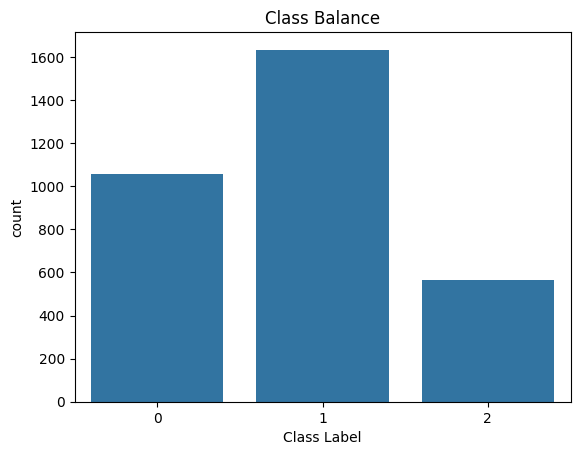

In [ ]:
# Analyze class distribution
print("\n--- Class Distribution ---")
print(data['Class Label'].value_counts())

# Visualize class balance
sns.countplot(x='Class Label', data=data)
plt.title("Class Balance")
plt.show()


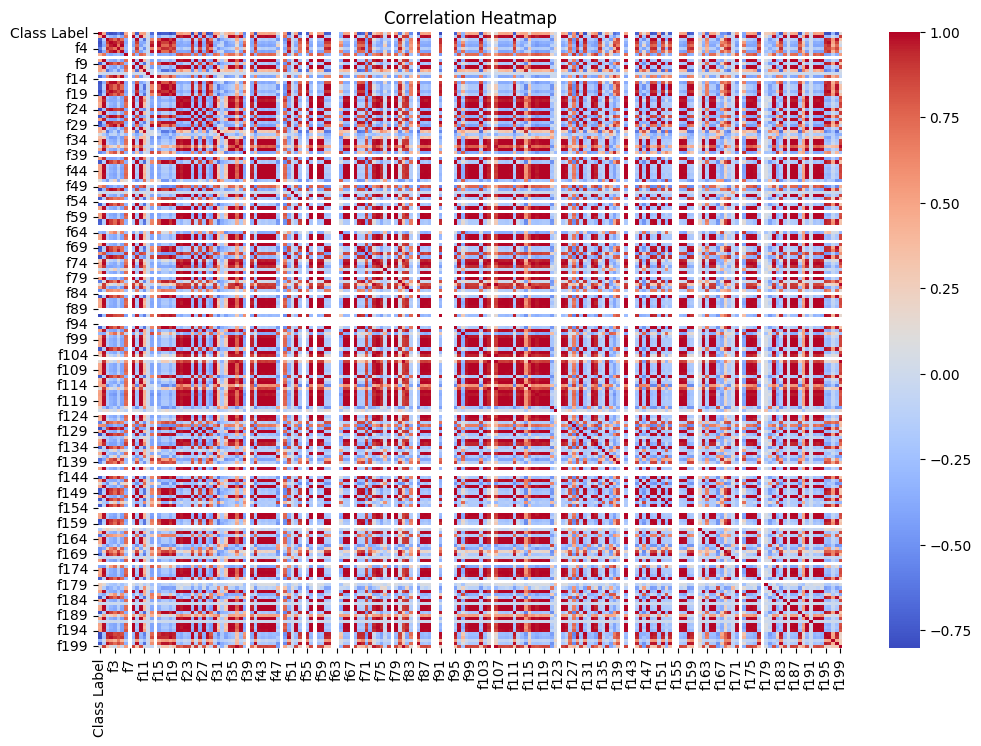

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Compute and visualize the correlation matrix
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Select only numeric columns for matrix rank calculation
numeric_data = data.select_dtypes(include=['number'])

# Compute the rank of the numeric matrix
rank = np.linalg.matrix_rank(numeric_data)
print(f"\n--- Matrix Rank ---\nRank of the dataset: {rank}")



--- Matrix Rank ---
Rank of the dataset: 175


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns

# Exclude non-numeric columns from features
features = data.drop(non_numeric_cols, axis=1)

# Normalize the numeric features using StandardScaler
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

print("\n--- Data Normalization ---\nData has been normalized.")



--- Data Normalization ---
Data has been normalized.


In [ ]:
# Split the dataset into training and testing sets (75:25 split)
X = normalized_features
y = data['Class Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("\n--- Train-Test Split ---")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")



--- Train-Test Split ---
Training set size: (2439, 201)
Testing set size: (814, 201)


In [ ]:
# Define classifiers
classifiers = {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train classifiers and evaluate metrics
results = []
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Predictions
    start_time = time.time()
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    test_time = time.time() - start_time

    # Metrics
    metrics = {
        "Classifier": name,
        "Train Accuracy": accuracy_score(y_train, y_pred_train),
        "Test Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test, average='weighted'),
        "Recall": recall_score(y_test, y_pred_test, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred_test, average='weighted'),
        "AUROC": roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr"),
        "Train Time (s)": train_time,
        "Test Time (s)": test_time
    }
    results.append(metrics)


In [ ]:
# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display the results
print("\n--- Classification Results ---")
print(results_df)



--- Classification Results ---
      Classifier  Train Accuracy  Test Accuracy  Precision    Recall  \
0            kNN         0.99180       0.981572   0.982279  0.981572   
1  Decision Tree         1.00000       1.000000   1.000000  1.000000   
2            SVM         0.99877       0.997543   0.997551  0.997543   
3  Random Forest         1.00000       0.982801   0.982905  0.982801   
4    Naive Bayes         1.00000       0.998771   0.998775  0.998771   

   F1-Score     AUROC  Train Time (s)  Test Time (s)  
0  0.981590  0.993924        0.011855       0.336951  
1  1.000000  1.000000        0.082577       0.002197  
2  0.997537  1.000000        1.561924       0.805751  
3  0.982713  0.999445        1.530854       0.062984  
4  0.998770  0.998508        0.007787       0.013483  


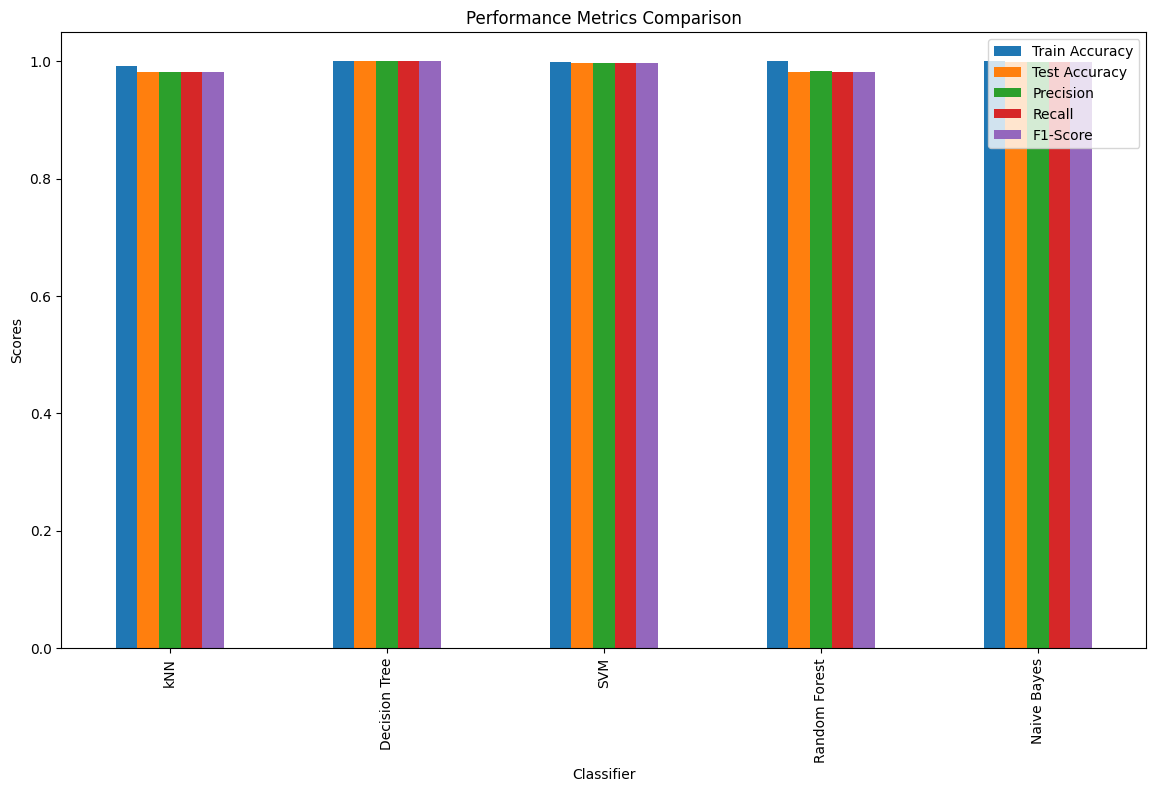

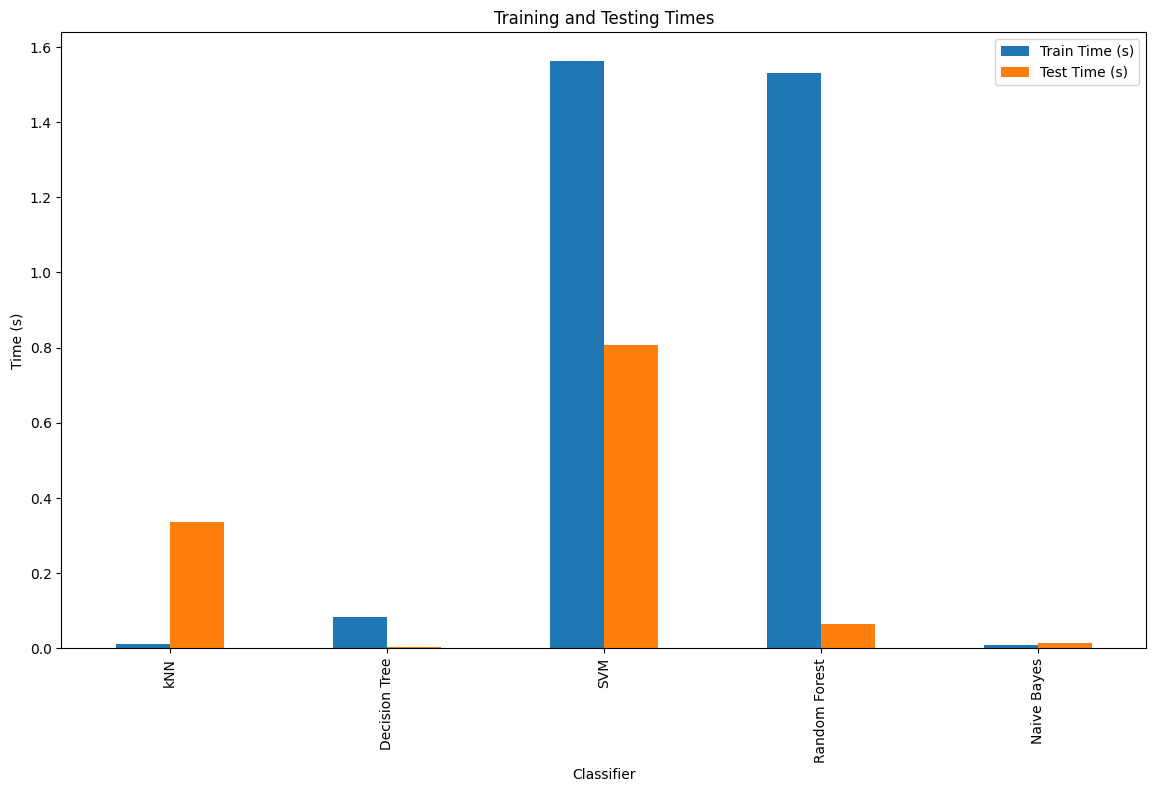

In [ ]:
# Plot performance metrics
results_df.set_index('Classifier', inplace=True)
results_df[['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(14, 8))
plt.title("Performance Metrics Comparison")
plt.ylabel("Scores")
plt.show()

# Plot training and testing times
results_df[['Train Time (s)', 'Test Time (s)']].plot(kind='bar', figsize=(14, 8))
plt.title("Training and Testing Times")
plt.ylabel("Time (s)")
plt.show()



--- Fit Results ---
      Classifier  Train Accuracy  Test Accuracy     Fit Type  Train Time (s)  \
0            kNN         0.99180       0.981572  Regular Fit        0.011855   
1  Decision Tree         1.00000       1.000000  Regular Fit        0.082577   
2            SVM         0.99877       0.997543  Regular Fit        1.561924   
3  Random Forest         1.00000       0.982801  Regular Fit        1.530854   
4    Naive Bayes         1.00000       0.998771  Regular Fit        0.007787   

   Test Time (s)  
0       0.336951  
1       0.002197  
2       0.805751  
3       0.062984  
4       0.013483  


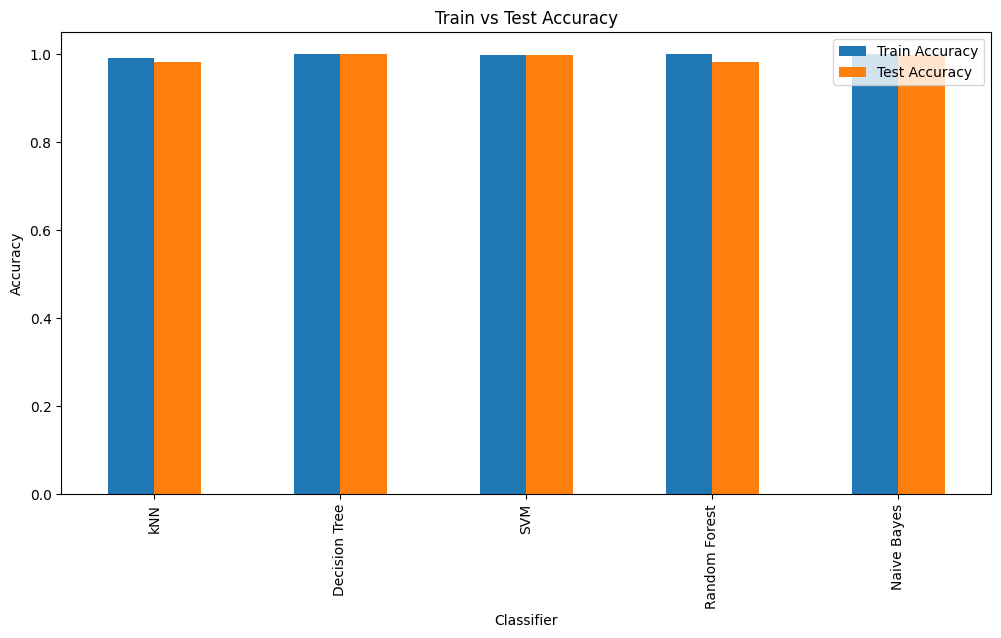

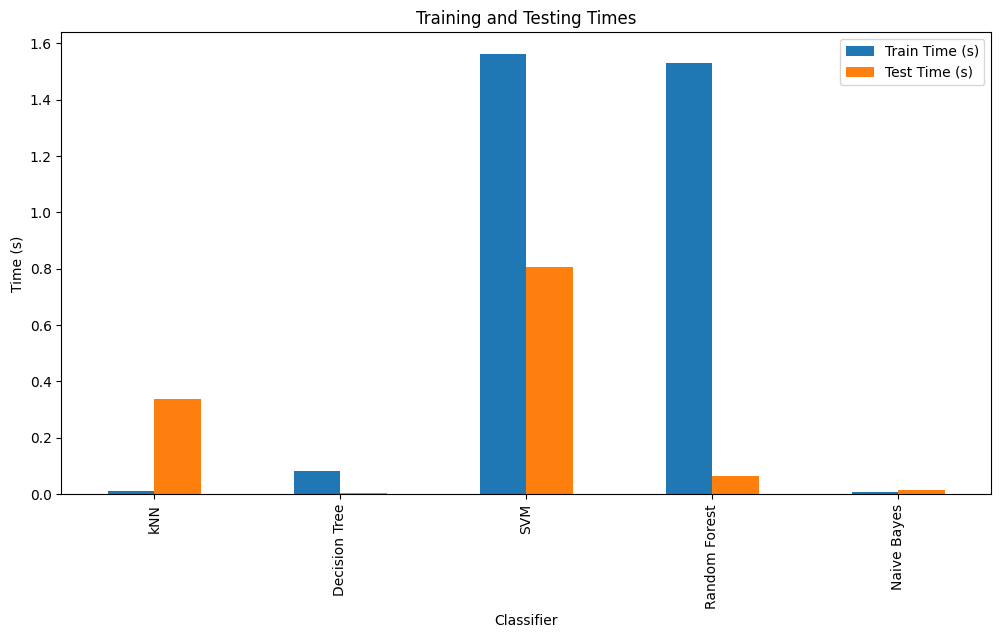

In [ ]:
# Check fit and timings of each model
fit_results = []
for metrics in results:
    classifier = metrics["Classifier"]
    train_acc = metrics["Train Accuracy"]
    test_acc = metrics["Test Accuracy"]
    train_time = metrics["Train Time (s)"]
    test_time = metrics["Test Time (s)"]

    # Check fit type
    if train_acc - test_acc > 0.1:
        fit_type = "Overfit"
    elif train_acc < 0.7 and test_acc < 0.7:
        fit_type = "Underfit"
    else:
        fit_type = "Regular Fit"

    # Store the fit results
    fit_results.append({
        "Classifier": classifier,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Fit Type": fit_type,
        "Train Time (s)": train_time,
        "Test Time (s)": test_time
    })

# Create a DataFrame for fit results
fit_results_df = pd.DataFrame(fit_results)

# Display fit results
print("\n--- Fit Results ---")
print(fit_results_df)

# Plot training and testing accuracy
fit_results_df.set_index("Classifier")[["Train Accuracy", "Test Accuracy"]].plot(kind='bar', figsize=(12, 6))
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()

# Plot training and testing times
fit_results_df.set_index("Classifier")[["Train Time (s)", "Test Time (s)"]].plot(kind='bar', figsize=(12, 6))
plt.title("Training and Testing Times")
plt.ylabel("Time (s)")
plt.show()
